In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
from scipy.stats import skew

In [29]:
data='./train.csv'
train=pd.read_csv(data,header=0)
train=pd.DataFrame(data=train)

In [30]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

# 의미없는 데이터 삭제와 너무 NULL값이 없는 데이터 삭제 

In [32]:
train=train.drop(["Alley"],axis=1)
train=train.drop(["PoolQC"],axis=1)
train=train.drop(["Fence"],axis=1)
train=train.drop(["MiscFeature"],axis=1)
train=train.drop(["Id"],axis=1)
train=train.drop(["MiscVal"],axis=1)

In [33]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,30,0,320,0,0,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,57,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,204,228,0,0,0,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,205,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,4,0,0,0,0,1,2008,WD,Normal,118000


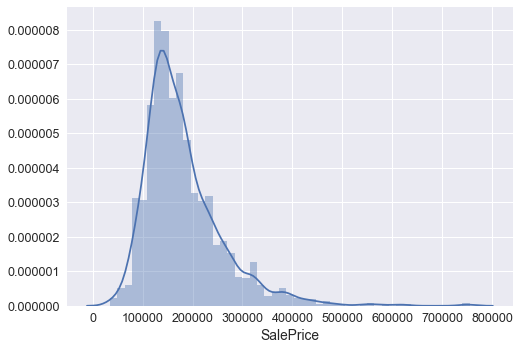

In [34]:
sns.distplot(train["SalePrice"])
plt.show()

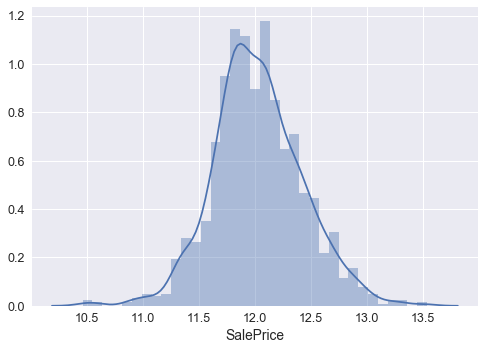

In [35]:
sns.distplot(np.log(train["SalePrice"]))
plt.show()

In [36]:
dummies=pd.get_dummies(train)

In [37]:
numerical_features = train.select_dtypes(include=["float64","int64","bool"]).columns.values
categorical_features = train.select_dtypes(include=["object"]).columns.values

In [38]:
numerical_features

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
       'YrSold', 'SalePrice'], dtype=object)

In [39]:
categorical_features

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype=object)

# 카테고리 데이터 분포 확인

In [40]:
len(categorical_features)

39

In [41]:
len(categorical_features)/3

13

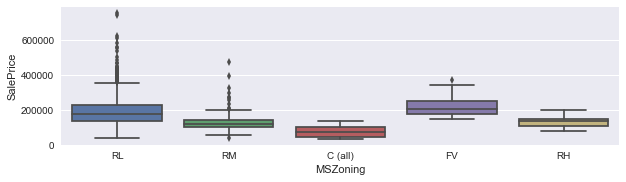

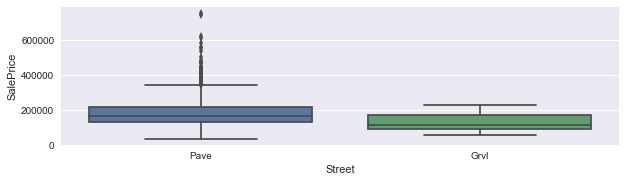

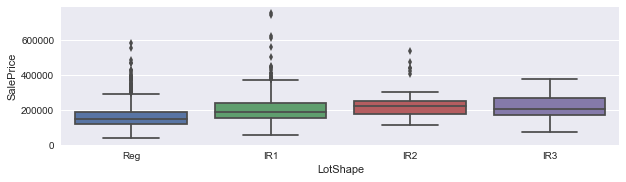

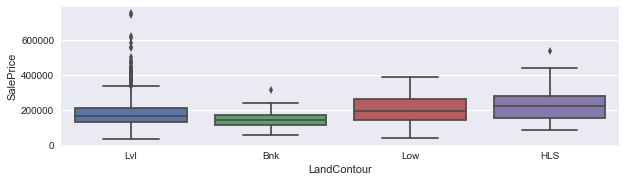

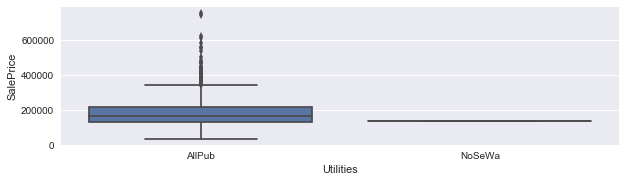

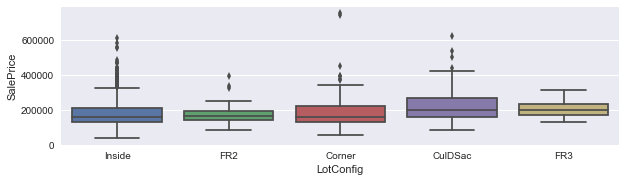

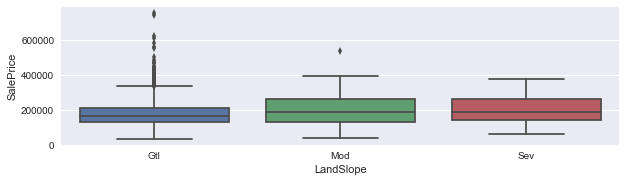

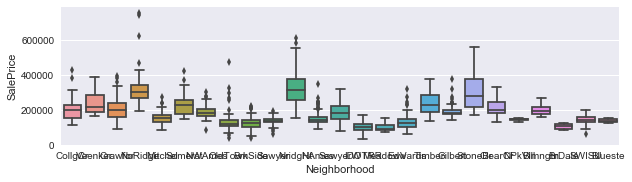

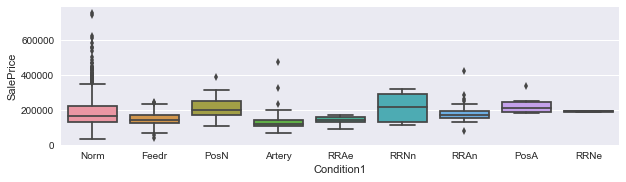

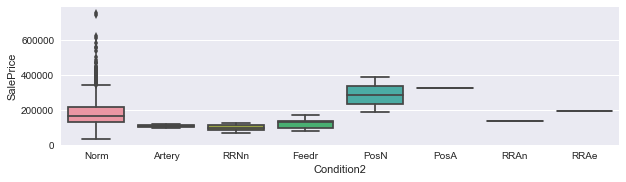

In [14]:
lst=list(train[categorical_features])
for i in range(10):
    plt.figure(figsize=(10,30))
    plt.subplot(10,1,i+1)
    sns.boxplot(x=lst[i], y='SalePrice', data=train)
plt.show()
   

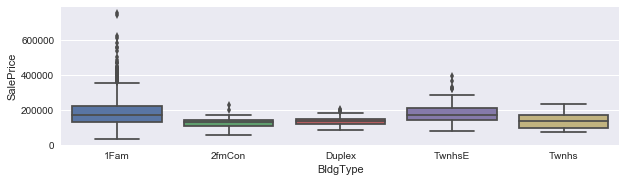

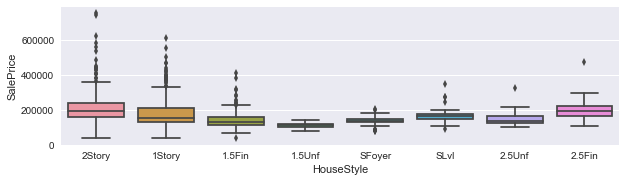

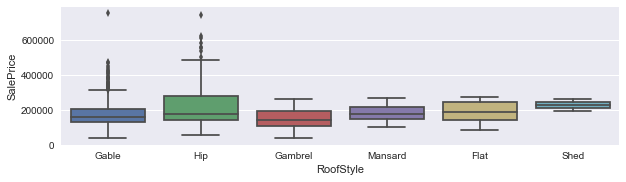

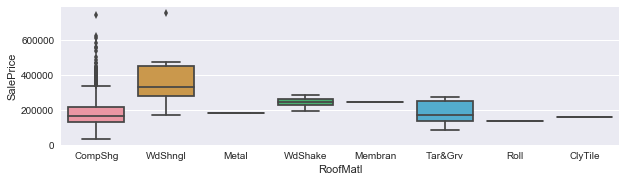

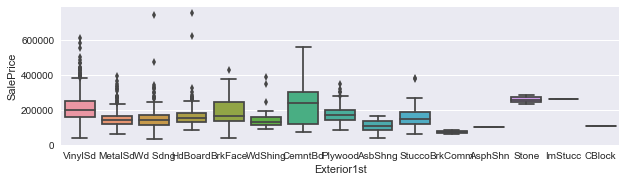

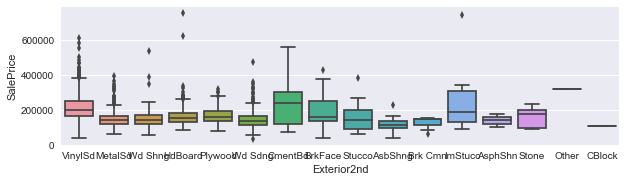

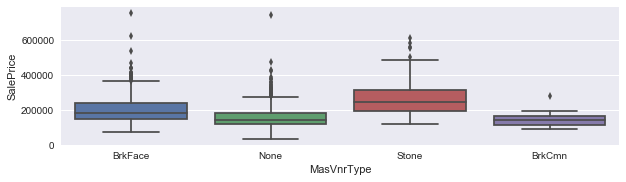

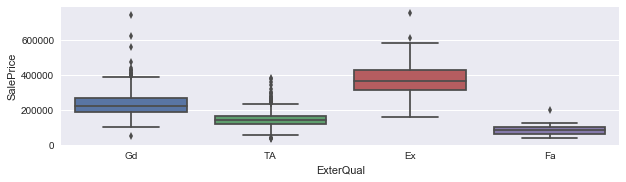

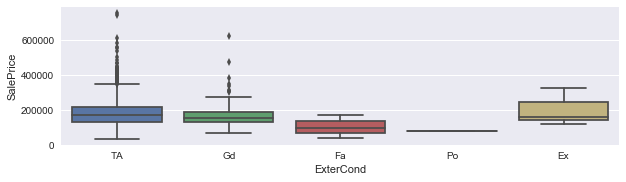

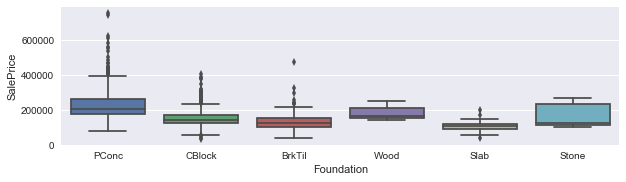

In [15]:
for i in range(10):
    plt.figure(figsize=(10,30))
    plt.subplot(10,1,i+1)
    sns.boxplot(x=lst[10+i], y='SalePrice', data=train)
plt.show()

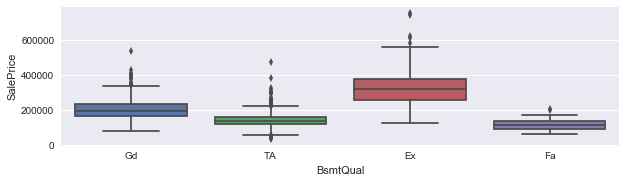

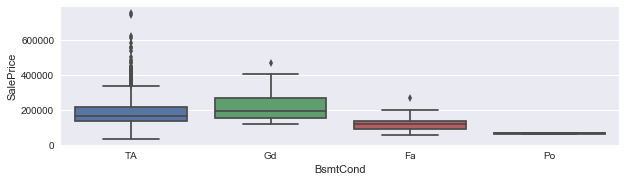

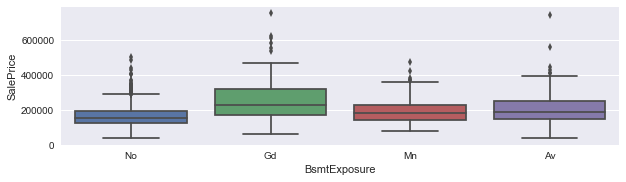

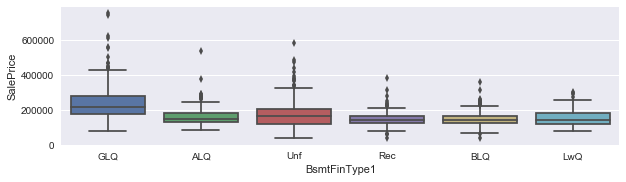

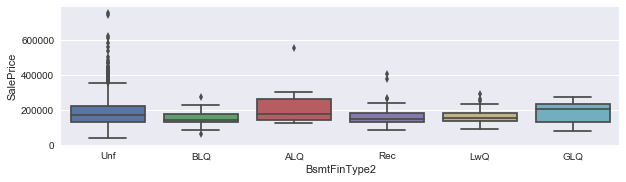

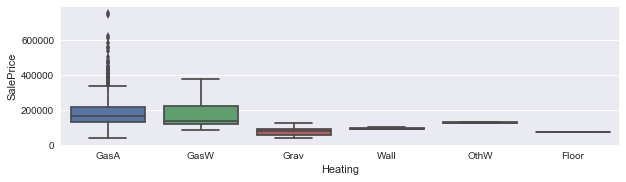

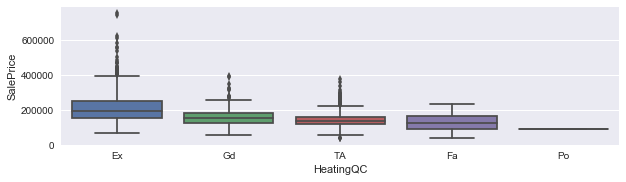

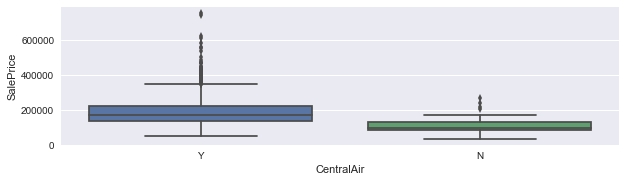

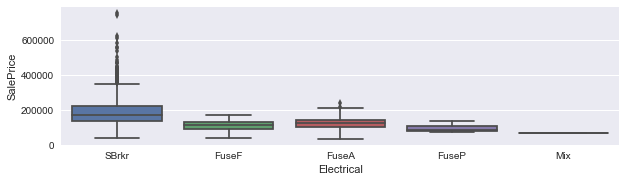

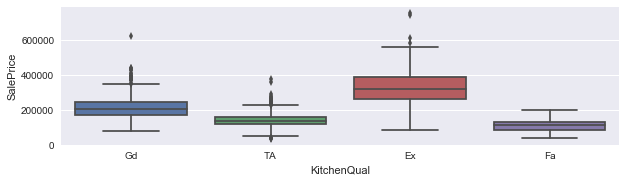

In [16]:

for i in range(10):
    plt.figure(figsize=(10,30))
    plt.subplot(10,1,i+1)
    sns.boxplot(x=lst[20+i], y='SalePrice', data=train)
plt.show()

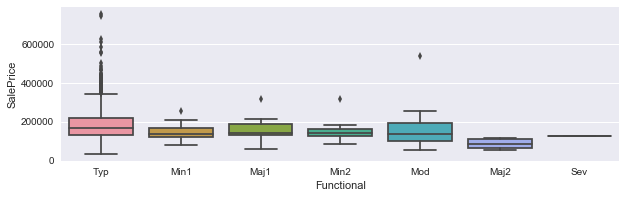

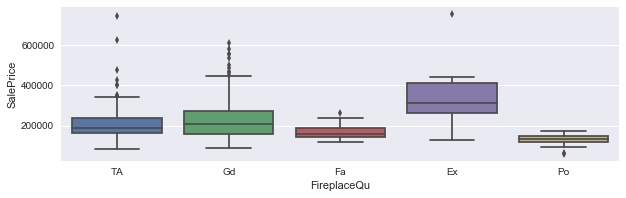

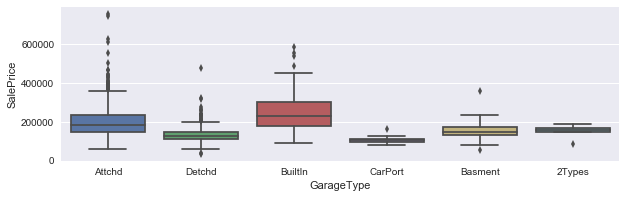

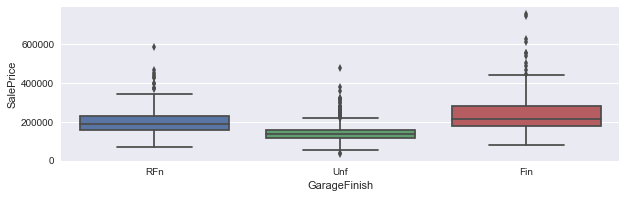

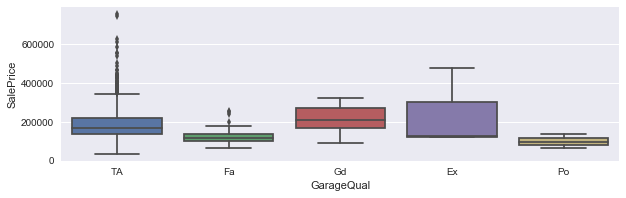

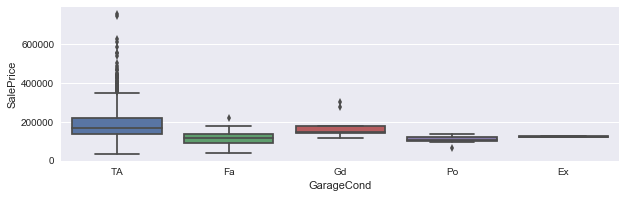

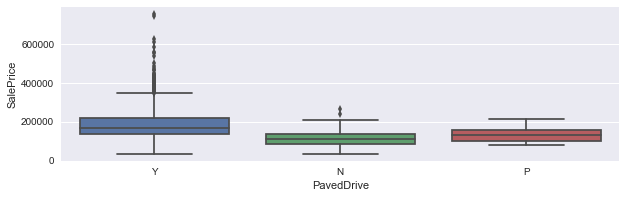

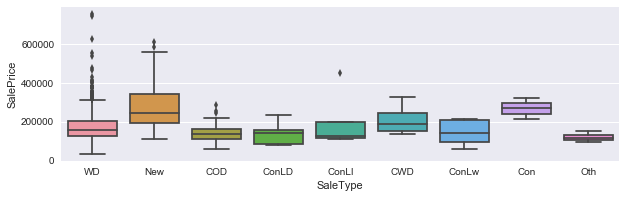

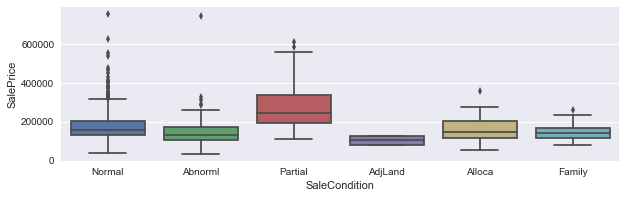

In [17]:

for i in range(9):
    plt.figure(figsize=(10,30))
    plt.subplot(9,1,i+1)
    sns.boxplot(x=lst[30+i], y='SalePrice', data=train)
plt.show()

# 연속적인 변수

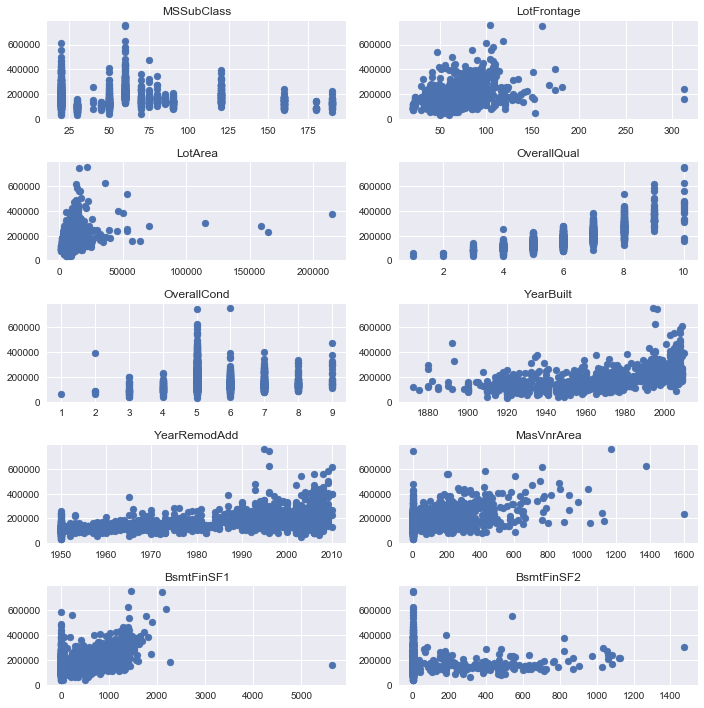

In [18]:


lst2=list(train[numerical_features])


plt.figure(figsize=(10,10))
for i in range(10):
   
    plt.subplot(5,2,i+1)
    plt.scatter(lst2[i],'SalePrice',data=train)
    plt.title(lst2[i])
plt.tight_layout()
plt.show()




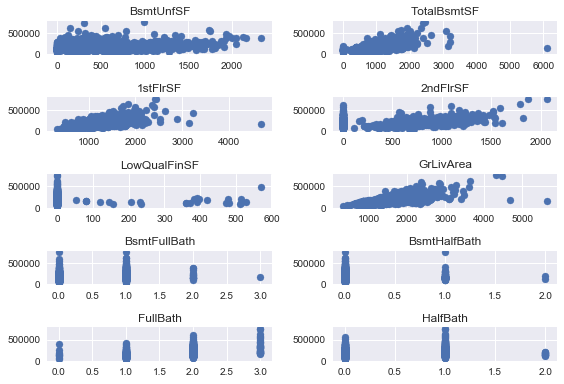

In [20]:

for i in range(10):
   
    plt.subplot(5,2,i+1)
    plt.scatter(lst2[10+i],'SalePrice',data=train)
    plt.title(lst2[10+i])
plt.tight_layout()
plt.show()


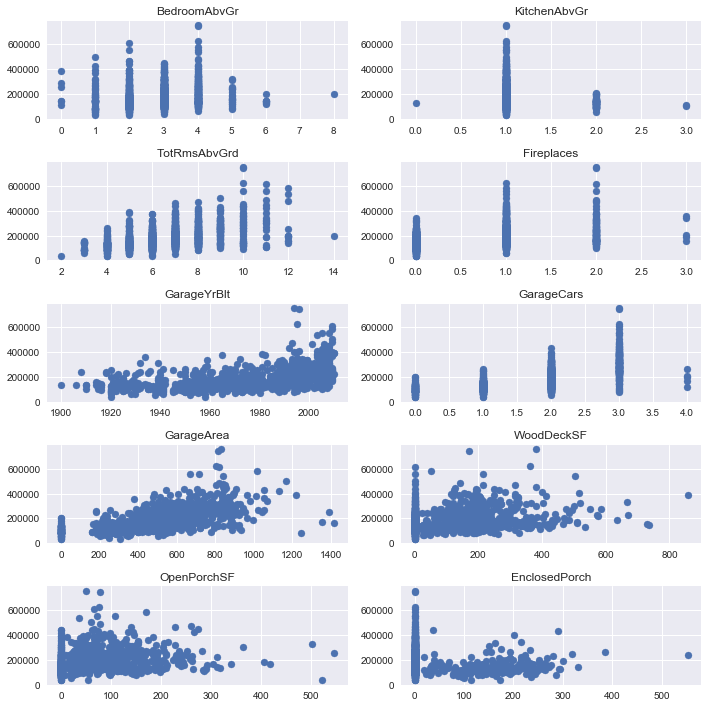

In [21]:
plt.figure(figsize=(10,10))
for i in range(10):
   
    plt.subplot(5,2,i+1)
    plt.scatter(lst2[20+i],'SalePrice',data=train)
    plt.title(lst2[20+i])
plt.tight_layout()
plt.show()

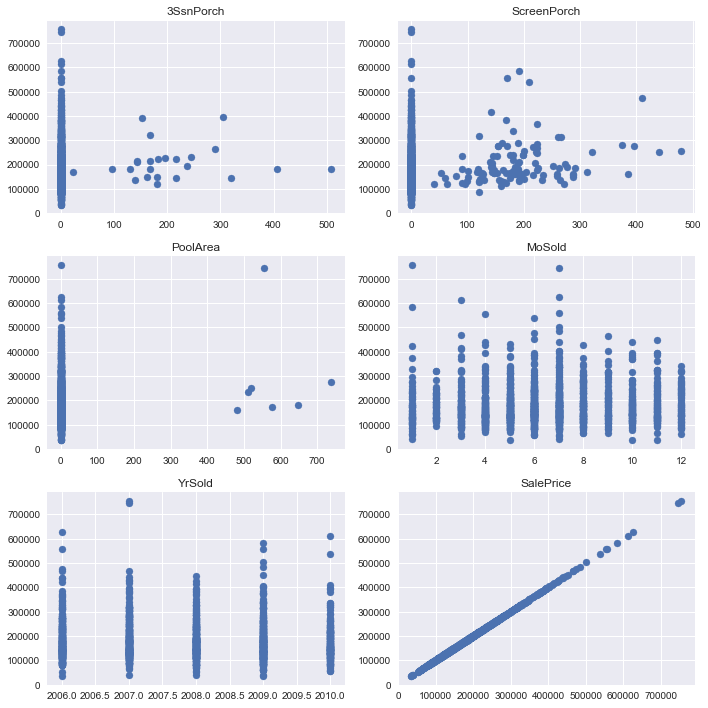

In [22]:
plt.figure(figsize=(10,10))
for i in range(6):
   
    plt.subplot(3,2,i+1)
    plt.scatter(lst2[30+i],'SalePrice',data=train)
    plt.title(lst2[30+i])
plt.tight_layout()
plt.show()

# corelation

In [42]:
corr=train.select_dtypes(include=["float64","int64"]).iloc[:,1:].corr()

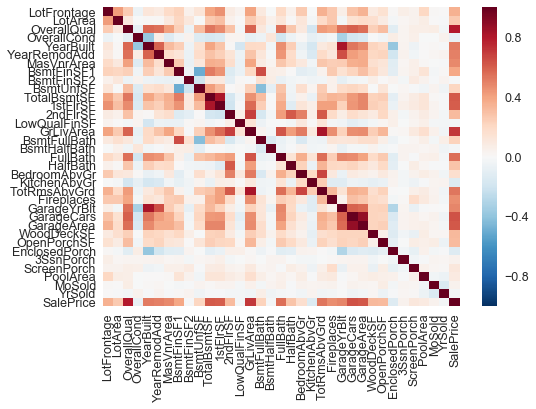

In [43]:
sns.heatmap(corr)
plt.show()


In [44]:
cor=corr["SalePrice"].to_dict()
cor.items

<function items>

In [45]:
for ele in sorted(cor.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))


SalePrice: 	1.0
OverallQual: 	0.790981600584
GrLivArea: 	0.708624477613
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
1stFlrSF: 	0.605852184692
FullBath: 	0.560663762748
TotRmsAbvGrd: 	0.533723155582
YearBuilt: 	0.522897332879
YearRemodAdd: 	0.507100967111
GarageYrBlt: 	0.486361677488
MasVnrArea: 	0.477493047096
Fireplaces: 	0.466928836752
BsmtFinSF1: 	0.386419806242
LotFrontage: 	0.351799096571
WoodDeckSF: 	0.324413444568
2ndFlrSF: 	0.319333802832
OpenPorchSF: 	0.315856227116
HalfBath: 	0.284107675595
LotArea: 	0.263843353871
BsmtFullBath: 	0.227122233131
BsmtUnfSF: 	0.214479105547
BedroomAbvGr: 	0.168213154301
KitchenAbvGr: 	-0.135907370842
EnclosedPorch: 	-0.128577957926
ScreenPorch: 	0.111446571143
PoolArea: 	0.0924035494919
OverallCond: 	-0.0778558940487
MoSold: 	0.0464322452238
3SsnPorch: 	0.0445836653357
YrSold: 	-0.0289225851687
LowQualFinSF: 	-0.0256061300007
BsmtHalfBath: 	-0.0168441542974
BsmtFinSF2: 	-0.0113781214502


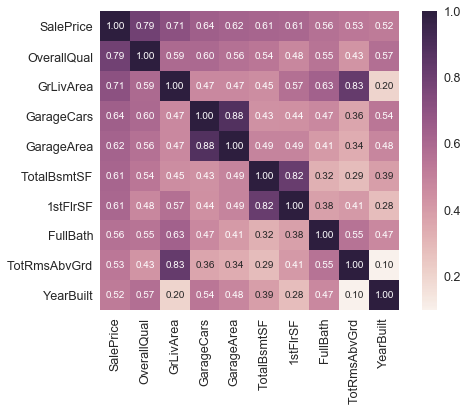

In [46]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

OverallQual: 	0.790981600584
GrLivArea: 	0.708624477613
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
1stFlrSF: 	0.605852184692

In [47]:
importnt_numeric=["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]

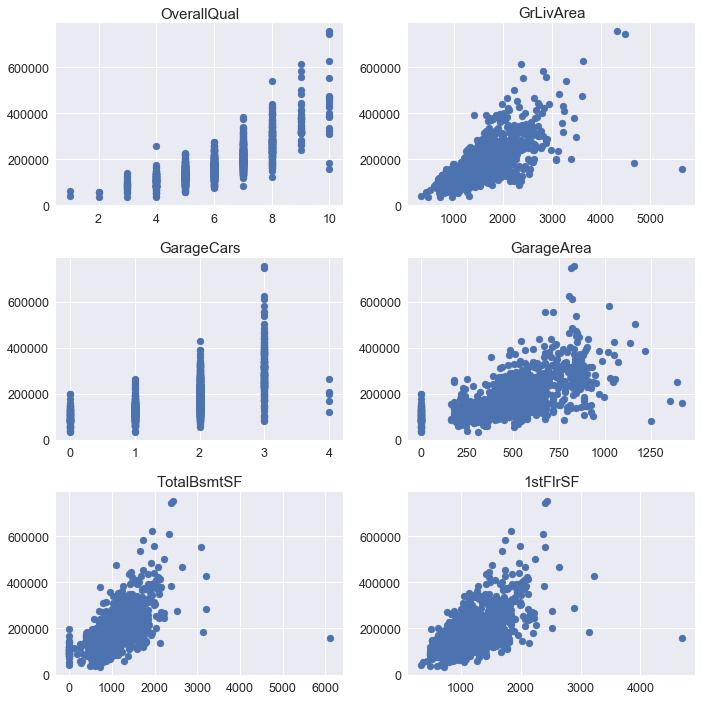

In [48]:
plt.figure(figsize=(10,10))
for i in range(6):
   
    plt.subplot(3,2,i+1)
    plt.scatter(train[importnt_numeric[i]],'SalePrice',data=train)
    plt.title(importnt_numeric[i])
plt.tight_layout()
plt.show()

In [49]:
train["SalePrice"]=np.log1p(train["SalePrice"])

In [50]:
skewed_feats = train[numerical_features].apply(lambda x: skew(x.dropna())) 
skewed_feats 

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MoSold            0.211835
YrSold            0.096170
SalePrice         0.121222
dtype: float64

In [51]:
skewed_feats =skewed_feats[skewed_feats>0.75]
skewed_feats=skewed_feats.index
skewed_feats

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'MasVnrArea', u'BsmtFinSF1',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF',
       u'LowQualFinSF', u'GrLivArea', u'BsmtHalfBath', u'KitchenAbvGr',
       u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch',
       u'ScreenPorch', u'PoolArea'],
      dtype='object')

In [52]:
train[skewed_feats]=np.log1p(train[skewed_feats])
train=train.fillna(train.mean())

In [53]:
train1=train.copy()

In [56]:
train1=pd.get_dummies(train1)
train1=train.fillna(train1.mean())


In [58]:
train1.shape

(1460, 75)

In [59]:
x_train=train1[:train1.shape[0]]



In [68]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
import time
from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge, LassoCV,LassoLarsCV, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from scipy.stats import skew

In [61]:
def mean_squared_error(ground_truth,predictions):
    return mean_squared_error(ground_truth,predictions)**0.5


In [72]:
class ensemble(object):
    def __init__(self,n_folds,stacker,base_models):
        self.n_folds=n_folds
        self.stacker=stacker
        self.base_models=base_models
        
    def fit_perdict(self,train,test,ytr):
        X=train.values
        y=ytr.values
        T=test.values
        
        folds=list(KFold(len(y)),n_folds=self.n_folds,shuffle=True,random_state=0)
        s_train=np.zeros((X.shape[0],len(self.base_models)))
        s_test=np.zeros(T.shape[0],len(self.base_models))
        
        for i, ref in enumerate(base_models):
            print("fittig the base model....")
            
            s_test_i=np.zeros(T.shape[0],len(folds))
            for j ,(train_idx,test_idx) in enumerate(folds):
                x_train=x[train_idx]
                y_train=y[train_idx]
                x_holdout=x[test_idx]
                reg.fit(x_train,y_train)
                y_pred=reg.predict(x_holdout[:])
                s_train[test_idx,i]=y_pred
                s_test_i[:,j]=reg.predict(T)[:]
            s_test[:,i]=s_test_i.mean(1)
            
            
        printing("stacking base models....")
        
        param_grid={
            
          'alpha': [1e-3,5e-3,1e-2,5e-2,1e-1,0.2,0.3,0.4,0.5,0.8,1e0,3,5,7,1e1],
            
        }
        
        grid=GridSearchCV(estimator=self.stacker, param_grid=parma_grid, n_jobs=1,cv=5,scoring=RMSE)
        gird.fit(s_train,y)
        
        try:
            print('Param grid:')
            print(param_grid)
            print('Best Params:')
            print(grid.best_params_)
            print('Best CV Score:')
            print(-grid.best_score_)
            print('Best estimator:')
            print(grid.best_estimator_)
            print(message)
        except:
            pass
        
        y_pred = grid.predict(S_test)[:]
        return y_pred, -grid.best_score_
    

In [73]:
base_models=[
    RandomForestRegressor(
    n_jobs=1, random_state=0,
    n_estimators=500, max_features=14
    
    
    ),
    
     RandomForestRegressor(
    n_jobs=1, random_state=0,
    n_estimators=500, max_features=20,
    max_depth=7
    
    ),
    
    
    ExtraTreesRegressor(
    n_jobs=1, random_state=0,
        n_estimators=500, max_features=15
    
    
    
    )
    ,
    
    ExtraTreesRegressor(
    n_jobs=1, random_state=0,
        n_estimators=500, max_features=20
    
    
    
    )
    ,
    
    GradientBoostingRegressor(
    
    random_state=0, 
        n_estimators=500, max_features=10, max_depth=6,
        learning_rate=0.05, subsample=0.8
    
    
    ),
    
    GradientBoostingRegressor(
    
    random_state=0, 
        n_estimators=500, max_features=15, max_depth=6,
        learning_rate=0.05, subsample=0.8
    
    
    )
,
    
    
    LassoCV(alphas=[1,0.1,0.001,0.0005]),
    KNeighborsRegressor(n_neighbors=5),
    KNeighborsRegressor(n_neighbors=10),
    KNeighborsRegressor(n_neighbors=15),
    KNeighborsRegressor(n_neighbors=25),
    LassoLarsCV(),
    ElasticNet(),
    SVR()
    
    
]


ensem=ensemble(

        n_folds=5,
    stacker=Ridge(),
    base_models=base_models



)


In [75]:
x_train,x_test,y_train = data_preprocess(train,test)
y_pred, score = ensem.fit_predict(x_train,x_test,y_train)

create_submission(np.expm1(y_pred),score)

NameError: name 'data_preprocess' is not defined